https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

Функция, чтобы убрать в тексте знаки препинаки, сформировать список частотных слов и обрезать его по заданному числу. 
* Принимает текст, список стоп-слов и число - количество самых частотных слов
* Возвращает список с самыми частотными словами и их количеством

In [2]:
import collections

def find_most_common_words(text, stop_words_list, words_count = 20):
    punctuations = '''-[]{};:'"/\\/<>@#$%^&*_|—«»~=!().?,”'''

    text = text.lower()

    # заменяем на пробелы, чтобы не слиплись слова в тех случаях, когда после запятой или точки не поставлен пробел
    # хотя наверняка в такого рода текстах случайно пробел не пропускали...
    for sybmol in text: 
        if sybmol in punctuations: 
            text = text.replace(sybmol, ' ')

    text_list = text.split()

    frequency_dict = {}

    for word in text_list:
        if word not in stop_words_list:
            count = frequency_dict.get(word, 0)
            frequency_dict[word] = count + 1

    word_counter = collections.Counter(frequency_dict)
    
    return word_counter.most_common(words_count)

Фунция, чтобы вывести гистограмму. Принимает частотный список

In [3]:
import pandas as pd

def create_hist(frequency_list):
    df = pd.DataFrame(frequency_list, columns = ['Word','Count'])
    ax = df.plot.barh(x = 'Word', y = 'Count', figsize = (15,10), grid = True)
    ax.invert_yaxis()

Функция, чтобы вывести облако слов (просто поиграться - было интересно посмотреть на цветную картинку). Принимает частотный список, но внутри делает из него словарь, потому что так надо функции :)

In [4]:
#!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_word_cloud(frequency_list):
    # create the WordCloud object
    wordcloud = WordCloud(background_color='white', width=500, height=500, scale=2)

    freq_dict = {}
    for word, count in frequency_list:
        freq_dict[word] = count

    # generate the word cloud
    wordcloud.generate_from_frequencies(freq_dict)

    #plot
    bx = plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    # соханить картинку
    #wordcloud.to_file('woman.png')

Основая часть. Еднакость.
* *ВОПРОС*: если я располагаю вызовы фунций в порядке сначала облако (create_word_cloud), потом гистограмма (create_hist), то работает, а если наоборот, то нет - как будто они там используют одни переменные или что-то, в общем, не понимаю. Почему так?

женщин: 37
женщины: 32
работниц: 16
войны: 14
движение: 13
стран: 12
борьбы: 11
партии: 10
движения: 10
сербии: 10
жизни: 9
своим: 9
работницы: 9
конференции: 9
среди: 9
борьбу: 8
женского: 8
организации: 8
еднакость: 8
рабочих: 7
революции: 7
рабочего: 7
социализма: 7
австралии: 7
югославии: 7
женское: 6
интернационал: 6
2: 6
социалисток: 6
социалистки: 6


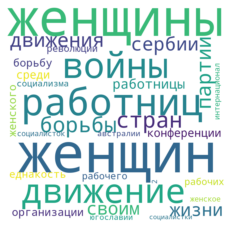

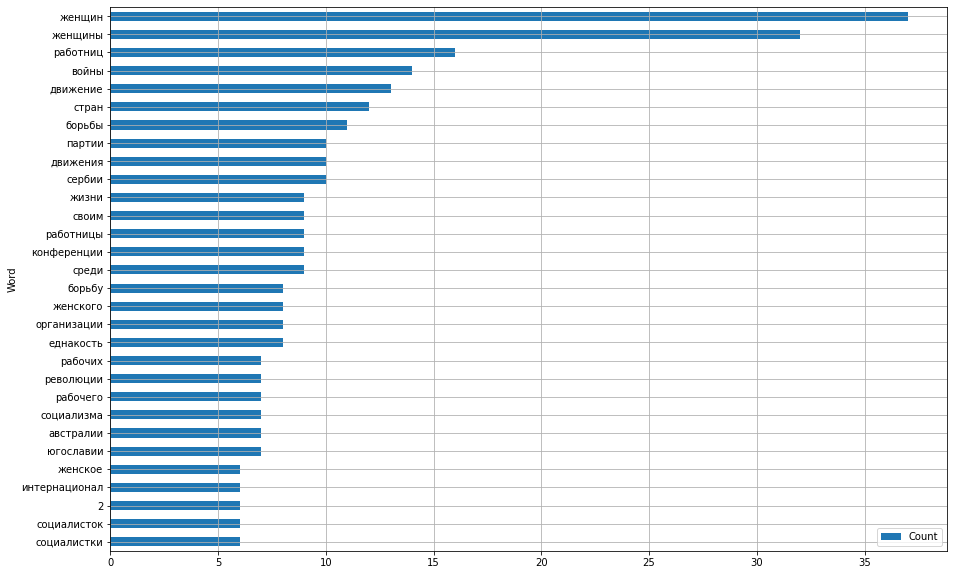

In [5]:
import urllib
import re

# подготавливаем исходники
text_link = 'https://raw.githubusercontent.com/sergeychuvakin/ML-TEXTS/master/intro/female.txt'
stop_words_link = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt'

with urllib.request.urlopen(text_link) as input_file:
    text = input_file.read().decode('utf-8')
    
# обрезаем текст так, чтобы осталась только содержимое
find_start = re.search('=Российская', text)
text = text[find_start.start():]
find_end = re.search('Печ. 10.000 экз.', text)
text = text[:find_end.end()]
    
with urllib.request.urlopen(stop_words_link) as input_file:
    stop_words = input_file.read().decode('utf-8')

stop_words_list = stop_words.split()

# вызываем функции для создания частотного списка и визуализации
words_count = 30

most_frequent_words_list = find_most_common_words(text, stop_words_list, words_count)

for word, count in most_frequent_words_list:
    print(word + ": " + str(count))

create_word_cloud(most_frequent_words_list)
create_hist(most_frequent_words_list)